# O projeto é uma análise de dados que deve conter as seguintes etapas:

•	Carregar e ler arquivos .csv, xlsx ou de um banco de dados;

•	Avaliar a necessidade da transformação da variável em outra escala (agrupar idade por faixas, por exemplo);

•	Realizar a codificação das variáveis categóricas conforme os valores das variáveis (label encoder, one hot encoder ou target encoder);

•	Normalizar as variáveis;

•	Avaliar a necessidade de realizar o balanceamento da variável alvo;

•	Tratar variáveis com alta correlação;

•	Realizar a seleção de variáveis;

•	Aplicar um modelo de regressão ou classificação utilizando uma técnica de hiperparametrização automática;

•	Aplicar uma medida de avaliação do modelo.

•	Gerar uma visualização para o resultado conforme os tipos abaixo:
    - Agrupamento: gerar a visualização Scatter;
    - Classificação: gerar a matriz de confusão; 
    - Regressão: gerar a visualização da linha de saída.


  Importando Bibliotecas

In [2]:
# DataFrame
import pandas as pd # O 'as' é um alias, um apelido. Ao invés de escrever 'pandas', escrevemos 'pd'
import numpy as np

# Modelos de ML
from sklearn.cluster import MiniBatchKMeans
from imblearn.over_sampling import SMOTE, RandomOverSampler, ADASYN, BorderlineSMOTE, KMeansSMOTE, SVMSMOTE
from imblearn.under_sampling import ClusterCentroids, CondensedNearestNeighbour, EditedNearestNeighbours
from imblearn.under_sampling import RepeatedEditedNearestNeighbours, TomekLinks, AllKNN, InstanceHardnessThreshold
from imblearn.under_sampling import NearMiss, NeighbourhoodCleaningRule, OneSidedSelection, RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Carregar o arquivo .csv usando o pd.read_csv()

In [3]:
df = pd.read_csv('Pokemon.csv') # Lê o arquivo .csv e armazena em um DataFrame
df.head() #  Traz os 5 primeiros registros do DataFrame

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


# 2. Avaliar a necessidade da transformação da variável em outra escala (agrupar idade por faixas, por exemplo)

Não vimos necessidade de escalar as variáveis, pois o dataset é pequeno e autoexplicativo.

In [4]:
df.drop(['#'], axis=1, inplace=True) # Remove a coluna '#'; o axis 1 indica que é uma coluna, se fosse 0, indicaria que é uma linha; inplace=True indica que a alteração é feita no próprio DataFrame
colunas = ['nome', 'tipo_1', 'tipo_2', 'total', 'hp', 'ataque', 'defesa', 'sp_atq', 'sp_def', 'velocidade', 'geracao', 'lendario'] # traduzindo as colunas e renomeando de uma forma mais amigável para o modelo, tirando espaços e maiúsculas
df.columns = colunas # Renomeia as colunas do DataFrame
df.head()

,nome,tipo_1,tipo_2,total,hp,ataque,defesa,sp_atq,sp_def,velocidade,geracao,lendario
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


# 3. Realizar a codificação das variáveis categóricas de acordo com os valores das variáveis (label encoder, one hot encoder ou target encoder)

In [5]:
# Label Encoder

from sklearn.preprocessing import LabelEncoder # Importa a classe LabelEncoder do módulo preprocessing da biblioteca sklearn

le = LabelEncoder() # O LabelEncoder faz sentido quando a variável categórica é ordinal, ou seja, tem uma ordem natural. O pokemon tem mais 'peso' por ser lendário.

df['lendario'] = le.fit_transform(df['lendario']) # Transforma os valores da coluna lendario em valores numéricos [0-1]
df.head()

,nome,tipo_1,tipo_2,total,hp,ataque,defesa,sp_atq,sp_def,velocidade,geracao,lendario
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,0
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,0
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,0
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,0
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,0


# 4. Normalizar as variáveis

In [6]:
# Antes, uma análise descritiva do DataFrame, é bom para observar valores discrepantes, outliers, e ter uma noção da distribuição dos dados.
df.describe()

,total,hp,ataque,defesa,sp_atq,sp_def,velocidade,geracao,lendario
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800.00000
mean,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375,0.08125
std,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129,0.27339
min,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000,0.00000
25%,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000,0.00000
50%,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000,0.00000
75%,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000,0.00000
max,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000,1.00000


In [7]:
# Antes, vamos tratar os NaN da coluna do tipo_2, pois muitos pokemons não tem 2 tipos de categorias.

df['tipo_2'].fillna('None', inplace=True) # Preenche os valores NaN da coluna tipo_2 com 'None'
df.isna().sum() # Verifica se há valores NaN no DataFrame

C:\Users\gusta\AppData\Local\Temp\ipykernel_26456\1992376372.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['tipo_2'].fillna('None', inplace=True) # Preenche os valores NaN da coluna tipo_2 com 'None'


nome          0
tipo_1        0
tipo_2        0
total         0
hp            0
ataque        0
defesa        0
sp_atq        0
sp_def        0
velocidade    0
geracao       0
lendario      0
dtype: int64

In [8]:
df.head()

,nome,tipo_1,tipo_2,total,hp,ataque,defesa,sp_atq,sp_def,velocidade,geracao,lendario
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,0
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,0
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,0
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,0
4,Charmander,Fire,None,309,39,52,43,60,50,65,1,0


In [9]:
from sklearn.preprocessing import StandardScaler # Importa a classe StandardScaler do módulo preprocessing da biblioteca sklearn

# O standardScaler é uma técnica de normalização que transforma os dados para que a média seja 0 e o desvio padrão seja 1.
# Se o valor da variável for menor que a média, o valor transformado será negativo. Se for maior, será positivo. Quanto maior o número, mais próximo, ou até maior que 1 ele será.

scaler = StandardScaler() # Instancia o StandardScaler
# Vamos usar o Scaler, pois ele é mais sensível a outliers, o que é comum em pokemons lendários. 

# Para manter o DataFrame original, vamos criar um DataFrame com os valores normalizados

df_norm = df.copy() # Cria uma cópia do DataFrame

numericals = df.select_dtypes(include=['int64', 'float64']) # Verifica os tipos das colunas int64 e float64
numericals.drop(columns=['lendario', 'geracao'], inplace=True) # Remove a coluna lendario, pois ela é categórica, e a geracao, pois não faz sentido normalizar



In [10]:
df_norm[numericals.columns] = scaler.fit_transform(df_norm[numericals.columns]) # Normaliza as colunas int64 e float64

df_norm.head()


,nome,tipo_1,tipo_2,total,hp,ataque,defesa,sp_atq,sp_def,velocidade,geracao,lendario
0,Bulbasaur,Grass,Poison,-0.976765,-0.950626,-0.924906,-0.797154,-0.239130,-0.248189,-0.801503,1,0
1,Ivysaur,Grass,Poison,-0.251088,-0.362822,-0.524130,-0.347917,0.219560,0.291156,-0.285015,1,0
2,Venusaur,Grass,Poison,0.749845,0.420917,0.092448,0.293849,0.831146,1.010283,0.403635,1,0
3,VenusaurMega Venusaur,Grass,Poison,1.583957,0.420917,0.647369,1.577381,1.503891,1.729409,0.403635,1,0
4,Charmander,Fire,None,-1.051836,-1.185748,-0.832419,-0.989683,-0.392027,-0.787533,-0.112853,1,0


In [11]:
df.head() # Como visto, manteve o df original.

,nome,tipo_1,tipo_2,total,hp,ataque,defesa,sp_atq,sp_def,velocidade,geracao,lendario
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,0
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,0
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,0
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,0
4,Charmander,Fire,None,309,39,52,43,60,50,65,1,0


Analisando a discrepância dos dados usando porcentagem, assim teremos um melhor insight sobre a distribuição dos dados e o que fazer com eles.

In [12]:
# Contagem de Pokémon lendários
num_lendario = df["lendario"].sum()
print(num_lendario)

# Contagem total de Pokémon
total_pokemon = len(df)
print(total_pokemon)

# Proporção de Pokémon lendários.
proporcao_lendarios = num_lendario / total_pokemon

print(f"Proporção de Pokémon lendários: {proporcao_lendarios:.2%}")

65
800
Proporção de Pokémon lendários: 8.12%


Deletando as colunas do tipo string para que possamos aplicar o SMOTE.

In [13]:
colunas_str = df_norm.select_dtypes(include=['object']).columns # Pegando todas as colunas do tipo "Object" e armazenando em uma lista

df_norm.drop(columns=colunas_str, inplace=True) # Passando a lista que pegamos acima, para que seja removido todas as colunas que nela pertence
df_norm.head()

,total,hp,ataque,defesa,sp_atq,sp_def,velocidade,geracao,lendario
0,-0.976765,-0.950626,-0.924906,-0.797154,-0.239130,-0.248189,-0.801503,1,0
1,-0.251088,-0.362822,-0.524130,-0.347917,0.219560,0.291156,-0.285015,1,0
2,0.749845,0.420917,0.092448,0.293849,0.831146,1.010283,0.403635,1,0
3,1.583957,0.420917,0.647369,1.577381,1.503891,1.729409,0.403635,1,0
4,-1.051836,-1.185748,-0.832419,-0.989683,-0.392027,-0.787533,-0.112853,1,0


# SMOTE - Synthetic Minority Over-sampling Technique

Cria cópias sintéticas (não existentes) dos Pokémons lendários para equilibrar as classes.

In [14]:
# Separando as features (X) e o target (y)

X = df_norm.drop(columns=["lendario"])
y = df_norm["lendario"]

In [15]:
# Separação dos dados de treino (80%) e teste (20%)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # o test_size=0.2 indica que 20% dos dados serão usados para teste


In [16]:
#Normalizando dos dados de treino e teste

min_max = MinMaxScaler()
min_max.fit(X_train)
X_train_norm = min_max.transform(X_train)
X_test_norm = min_max.transform(X_test)

In [17]:
# Aplicando o SMOTE para oversampling

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train_norm, y_train)
X_smote.shape


(1170, 8)

In [18]:
X_smote

array([[0.66666667, 0.36734694, 0.37837838, ..., 0.45238095, 0.45714286,
        0.2       ],
       [0.5       , 0.3877551 , 0.72972973, ..., 0.16666667, 0.51428571,
        0.8       ],
       [0.5       , 0.16326531, 0.54054054, ..., 0.35714286, 0.25714286,
        0.4       ],
       ...,
       [0.7936868 , 0.35399658, 0.77574732, ..., 0.35263343, 0.48741342,
        0.8       ],
       [0.83837359, 0.56217096, 0.5216869 , ..., 0.47619048, 0.49867494,
        0.6       ],
       [0.70337654, 0.28807688, 0.46102388, ..., 0.43270596, 0.59669237,
        0.4       ]])

In [19]:
y_smote

0       1
1       0
2       0
3       0
4       0
       ..
1165    1
1166    1
1167    1
1168    1
1169    1
Name: lendario, Length: 1170, dtype: int64

In [20]:
y_smote.value_counts()

lendario
1    585
0    585
Name: count, dtype: int64

# SVM - Support Vector Machine



In [21]:
modelo_svm = SVC(kernel='rbf', random_state=42)
modelo_svm.fit(X_smote, y_smote)
y_pred = modelo_svm.predict(X_test_norm)

In [22]:
print('Acurácia:', accuracy_score(y_test, y_pred))
print('Revocação:', recall_score(y_test, y_pred, average='weighted'))
print('Precisão:', precision_score(y_test, y_pred,average='weighted'))

Acurácia: 0.9375
Revocação: 0.9375
Precisão: 0.96875


# KNN - K-Nearest Neighbors

In [23]:
modelo_knn = KNeighborsClassifier(n_neighbors=3)
modelo_knn.fit(X_smote, y_smote)
y_pred = modelo_knn.predict(X_test_norm)

In [24]:
print('Acurácia:', accuracy_score(y_test, y_pred))
print('Revocação:', recall_score(y_test, y_pred, average='weighted'))
print('Precisão:', precision_score(y_test, y_pred,average='weighted'))

Acurácia: 0.93125
Revocação: 0.93125
Precisão: 0.9604563269876818


Undersampling: ReduzaREduzindo aleatoriamente o número de exemplos da classe majoritária (não lendários)

In [25]:
# Contagem de exemplos por classe
contagem_por_classe = df["lendario"].value_counts()
contagem_por_classe

lendario
0    735
1     65
Name: count, dtype: int64

In [26]:
# Defenindo o número máximo de exemplos por classe (no seu caso, 500)
n_maximo_por_classe = 500

In [27]:
# Filtrando as classes com mais exemplos do que o limite
classes_maior_que_limite = contagem_por_classe[contagem_por_classe > n_maximo_por_classe].index

In [28]:
# Faazendo uma seleção aleatória de exemplos das classes maiores que o limite
exemplos_undersampled = pd.concat([
    df[df["lendario"] == classe].sample(n=n_maximo_por_classe, replace=False)
    for classe in classes_maior_que_limite
])

In [29]:
# Mantendo os exemplos das classes menores que o limite
exemplos_undersampled = pd.concat([
    exemplos_undersampled,
    df[df["lendario"].isin(classes_maior_que_limite) == False]
])

In [30]:
# Agora exemplos_undersampled contém o DataFrame com a classe "lendário" balanceada
exemplos_undersampled


,nome,tipo_1,tipo_2,total,hp,ataque,defesa,sp_atq,sp_def,velocidade,geracao,lendario
691,Mandibuzz,Dark,Flying,510,110,65,105,55,95,80,5,0
491,Gible,Dragon,Ground,300,58,70,45,40,45,42,4,0
238,Swinub,Ice,Ground,250,50,50,40,30,30,50,2,0
142,Lapras,Water,Ice,535,130,85,80,85,95,60,1,0
186,Pichu,Electric,None,205,20,40,15,35,35,60,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
795,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,1
796,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,1
797,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,1
798,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,1


In [31]:
#Randon Sampling gerando numeros mais proximos utilizando uma matriz de covariancia
randon_sampler = RandomOverSampler(random_state=42)
X_random, y_random = randon_sampler.fit_resample(X,y)
X_random.shape

(1470, 8)

In [32]:
y_random.shape

(1470,)

In [33]:
X_random.value_counts()

total      hp         ataque     defesa     sp_atq     sp_def     velocidade  geracao
 2.042718   2.223516   1.603065   0.678908   1.779105   0.938370   1.057853   6          27
 1.208607   0.381730   1.109803  -0.123299   1.595629   0.291156   1.471044   5          23
 2.209541  -0.754692   2.497104   1.160233   2.665905   1.369846   1.436611   6          20
 2.042718   1.204656   1.263947   1.481116   2.360112   1.010283   0.747961   4          19
 1.208607   0.812786   0.184935   0.839350   0.678249   1.909191   0.575798   1          17
                                                                                         ..
-0.584733   0.029047  -0.524130  -0.219564  -0.544924  -0.607752  -0.422745   1           1
-0.551369  -0.284448  -0.894077  -0.508359   0.005504  -0.643708   0.128175   6           1
-0.543027  -0.362822  -1.202366  -0.444182   0.678249  -0.427970  -0.457178   5           1
           -0.166887  -1.202366  -0.765065   1.595629  -0.427970  -1.317991   5       

In [34]:
y_random.value_counts()

lendario
0    735
1    735
Name: count, dtype: int64

In [35]:
rs = pd.DataFrame({"Nome": y.value_counts().index,
              "Qte.": y.value_counts().values,
              "% Total": round(y.value_counts(normalize=True) * 100,2).values})

In [51]:
rs

,Nome,Qte.,% Total
0,0,735,91.88
1,1,65,8.12


In [37]:
centroids_under =ClusterCentroids(estimator=MiniBatchKMeans(n_init=10, random_state=0), random_state=42)
X_centroid, y_centroid = centroids_under.fit_resample(X,y)
X_centroid.shape

(130, 8)

In [38]:
y_centroid.value_counts()

lendario
0    65
1    65
Name: count, dtype: int64

In [50]:
df_norm.shape


(800, 9)

# 5. Tratar variáveis com alta correlação

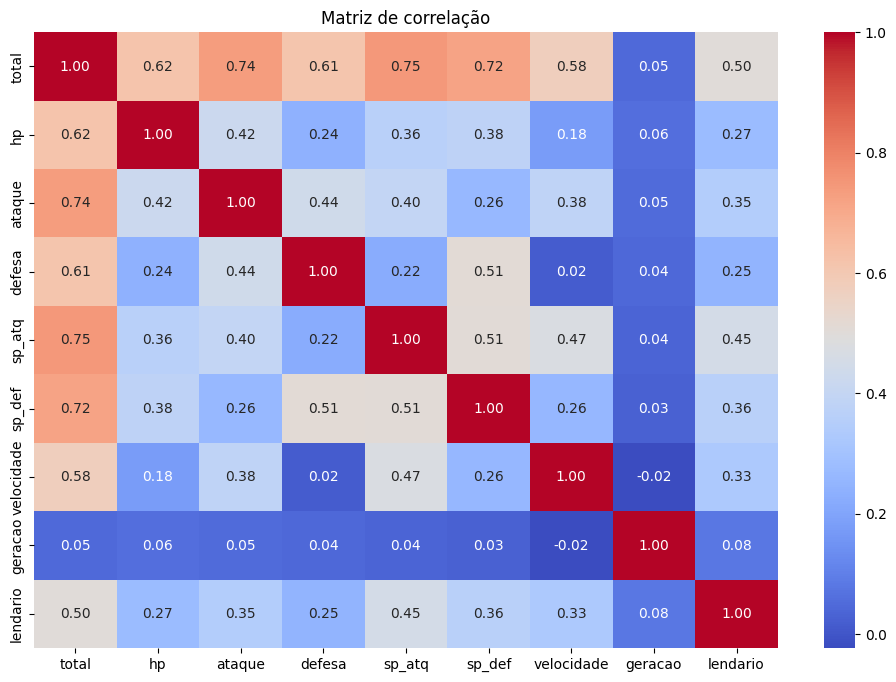

In [40]:
# Vamos verificar a correlação entre as variáveis usando um gráfico de calor

corr_matrix = df_norm.corr() # Calcula a matriz de correlação

plt.figure(figsize= (12, 8)) # Define o tamanho da figura
sns.heatmap(corr_matrix, annot= True, cmap= 'coolwarm', fmt=".2f") # Cria o gráfico de calor
plt.title("Matriz de correlação") # Define o título do gráfico
plt.show() # Exibe o gráfico


Com esse gráfico, notamos que há pouca correlação entre as variáveis, o que é bom para o modelo. Não será necessário remover ou tratar nenhuma variável.

 *  Lembrando que a leitura desse gráfico se dá pelo seguinte:
    -   Quanto mais próximo de 1, mais forte é a correlação positiva entre as variáveis; - algo ruim
    -   Quanto mais próximo de -1, mais forte é a correlação negativa entre as variáveis; - também é algo ruim
    -   Quanto mais próximo de 0, mais fraca é a correlação entre as variáveis. - algo bom

Variáveis com alta correlação ou correlação invertida podem ser um problema para o modelo, pois ele não saberá qual variável é mais importante para a previsão, além de que o modelo também não consegue analisar a importância da individualidade da classe. Isso pode causar overfitting, ou seja, o modelo se ajusta muito bem aos dados de treino, mas não consegue generalizar para novos dados.

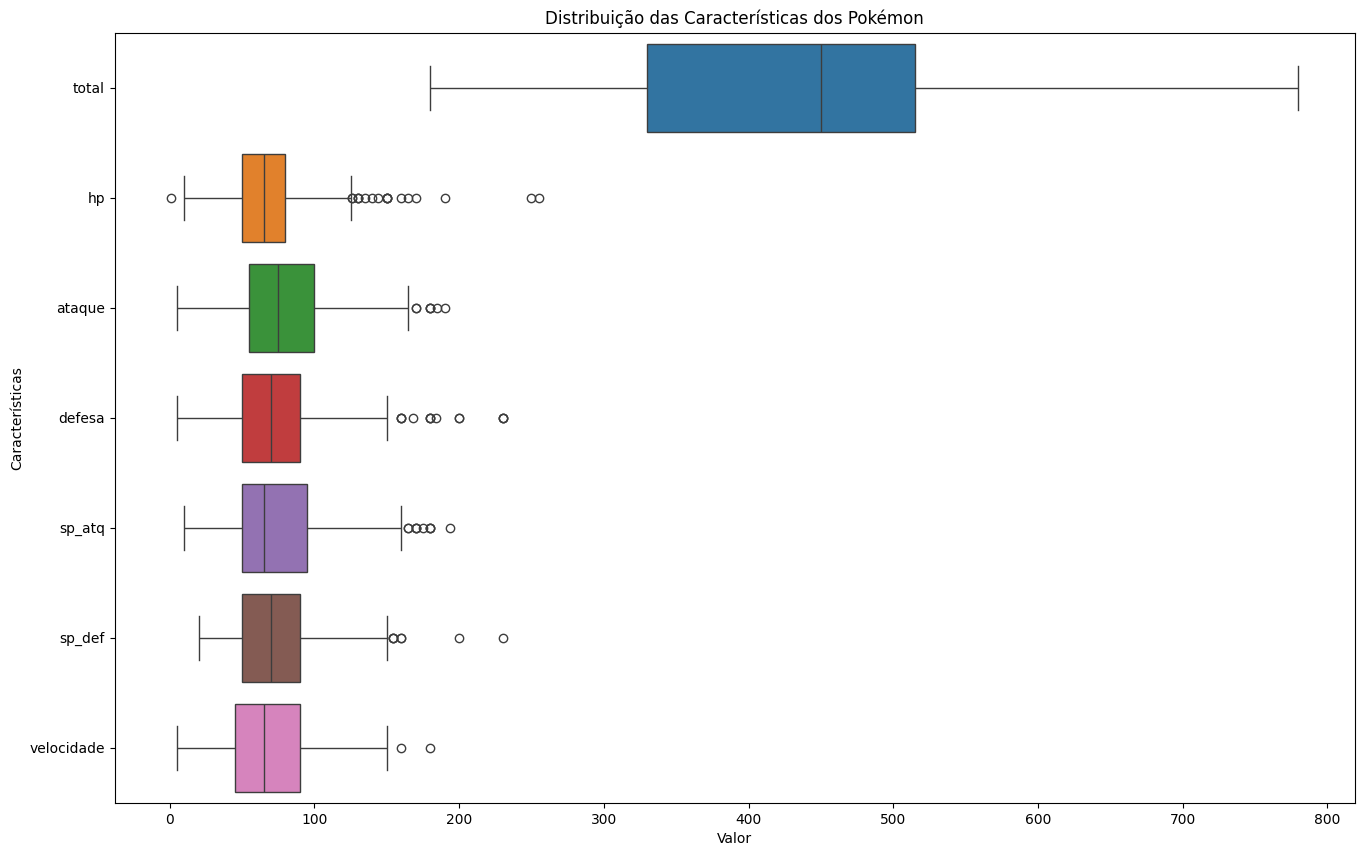

In [41]:
# Distribuição das Características dos Pokémon
# Vizualização criada para verificar a distribuição das características dos Pokémon, como HP, Ataque, Defesa, etc.
plt.figure(figsize=(16, 10))
sns.boxplot(data=df.drop(['lendario', 'geracao'], axis=1), orient='h')
plt.title('Distribuição das Características dos Pokémon')
plt.xlabel('Valor')
plt.ylabel('Características')
plt.show()

<Figure size 1200x800 with 0 Axes>

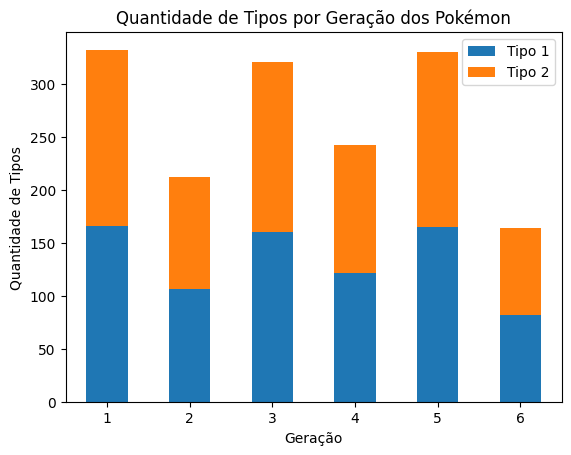

In [54]:
# Contagem de tipos por geração dos Pokémon
# O seguinte plot mostra a diferença de quantidade de pokemons que possuem mais de um tipo em cada geração
plt.figure(figsize=(12, 8))
types_by_generation = df.groupby('geracao')[['tipo_1', 'tipo_2']].agg(lambda x: x.notna().sum())
types_by_generation.plot(kind='bar', stacked=True)
plt.title('Quantidade de Tipos por Geração dos Pokémon')
plt.xlabel('Geração')
plt.ylabel('Quantidade de Tipos')
plt.xticks(rotation=0)
plt.legend(['Tipo 1', 'Tipo 2'])
plt.show()


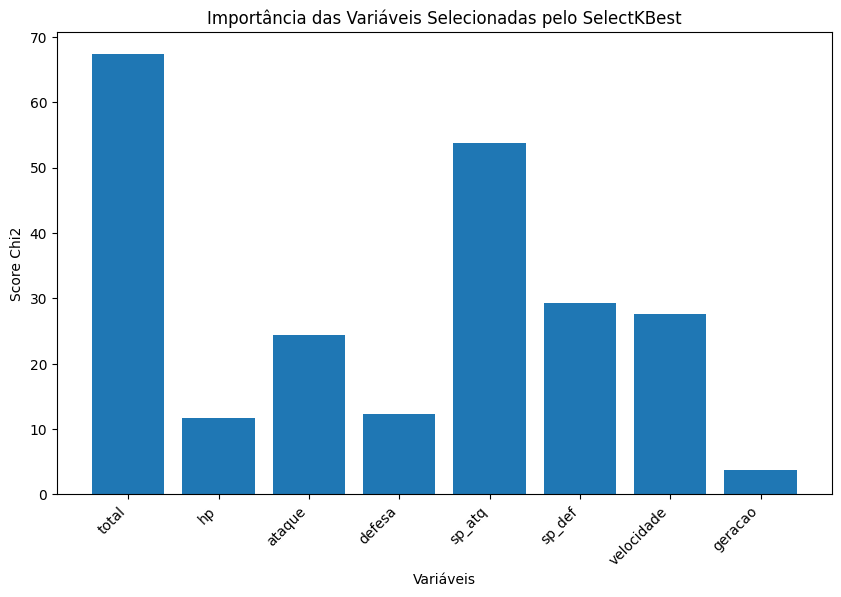

In [45]:
# Importância das Variáveis Selecionadas pelo SelectKBest
# Este plot mostra a importância das variáveis selecionadas pelo SelectKBest usando o score Chi2.
# Quanto maior o valor do score, mais importante é a variável na previsão se um Pokémon é lendário ou não.
# As variáveis selecionadas são aquelas que têm os maiores scores de Chi2.
plt.figure(figsize=(10, 6))
plt.bar(range(len(seletor.scores_)), seletor.scores_, tick_label=X.columns)
plt.title('Importância das Variáveis Selecionadas pelo SelectKBest')
plt.xlabel('Variáveis')
plt.ylabel('Score Chi2')
plt.xticks(rotation=45, ha='right')
plt.show()

# 6. Realizar a seleção de variáveis

In [42]:
# Vamos selecionar as variáveis mais importantes na hora de prever se um pokémon é lendário ou não.

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Instancia o SelectKBest
seletor = SelectKBest(score_func=chi2, k=4) # O score_func é a função que será usada para calcular a importância das variáveis. O chi2 é uma função estatística que calcula a relação entre variáveis categóricas.
X_selecionado = seletor.fit_transform(X_smote, y_smote) # Seleciona as variáveis mais importantes já escaladas com o smote, ou seja, com os dados balanceados dos pokemons lendários e não lendários. Evitando assim, um viés na seleção das variáveis.

X_selecionado

array([[0.66666667, 0.43478261, 0.45238095, 0.45714286],
       [0.5       , 0.10869565, 0.16666667, 0.51428571],
       [0.5       , 0.24456522, 0.35714286, 0.25714286],
       ...,
       [0.7936868 , 0.57358568, 0.35263343, 0.48741342],
       [0.83837359, 0.49734824, 0.47619048, 0.49867494],
       [0.70337654, 0.65531976, 0.43270596, 0.59669237]])

In [43]:
# Vamos ver quais variáveis foram selecionadas
seletor.get_support() # Retorna um array booleano indicando as variáveis selecionadas
# Vamos ver o nome das variáveis selecionadas
X.columns[seletor.get_support()] # Retorna o nome das variáveis selecionadas

Index(['total', 'sp_atq', 'sp_def', 'velocidade'], dtype='object')

Aqui vemos que as variáveis que mais dizem algo relevante, onde há mais discrepâncias e dados valiososm estão nas colunas "total", "sp_atq" (super ataque), "sp_def" (super defesa) e "velocidade"